# Problem Statement
### Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.

### Importing necessary libraries

In [11]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading dataset into dataframe

In [15]:
df=pd.read_csv("Heart Disease data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Check the datatypes and transforming which doesnt suit the business needs

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Handling duplicate and missing values

In [16]:
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)


Number of Duplicate Rows: 723


In [5]:
total_missing_values = df.isna().sum().sum() 
print("Total Missing Values:", total_missing_values)

Total Missing Values: 0


### Look into outliers

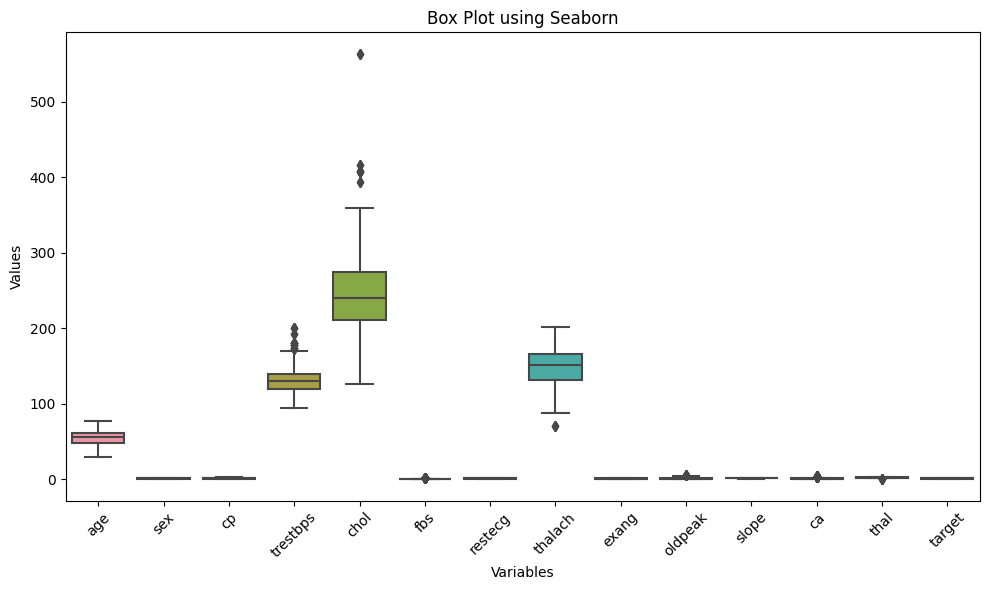

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot using Seaborn')
plt.xticks(rotation=45)  # Optionally, rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Data Analysis 

### Heart disease by age

  age_group    target
0      0-20       NaN
1     21-40  0.661765
2     41-60  0.540146
3     61-80  0.408088
4    81-100       NaN


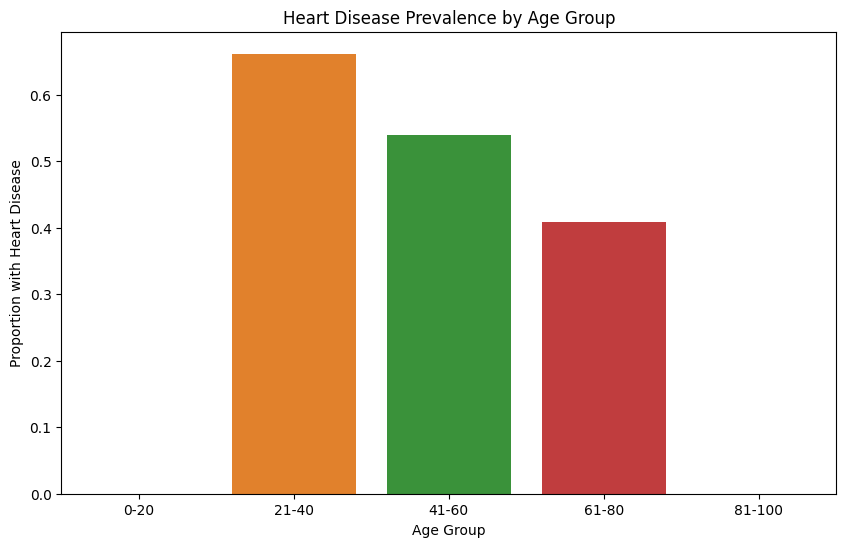

In [20]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Calculate the prevalence of heart disease within each age group
age_group_heart_disease = df.groupby('age_group')['target'].mean().reset_index()
print(age_group_heart_disease)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='target', data=age_group_heart_disease)
plt.xlabel('Age Group')
plt.ylabel('Proportion with Heart Disease')
plt.title('Heart Disease Prevalence by Age Group')
plt.show()

### Heart disease by sex

   sex    target
0    0  0.724359
1    1  0.420757


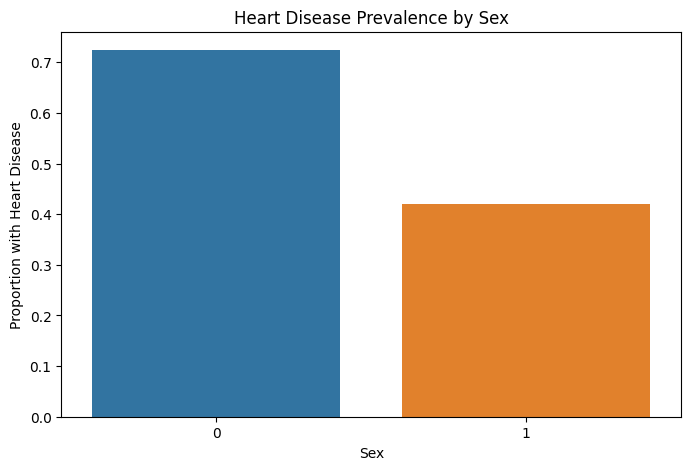

In [21]:
sex_heart_disease = df.groupby('sex')['target'].mean().reset_index()
print(sex_heart_disease)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='target', data=sex_heart_disease)
plt.xlabel('Sex')
plt.ylabel('Proportion with Heart Disease')
plt.title('Heart Disease Prevalence by Sex')
plt.show()

### Distribution of Serum Cholesterol

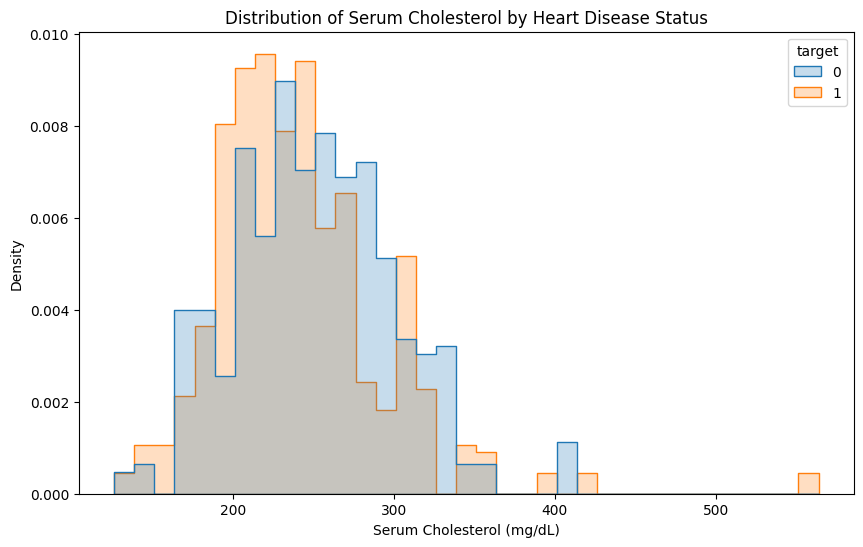

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='target', element='step', stat='density', common_norm=False)
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Density')
plt.title('Distribution of Serum Cholesterol by Heart Disease Status')
plt.show()

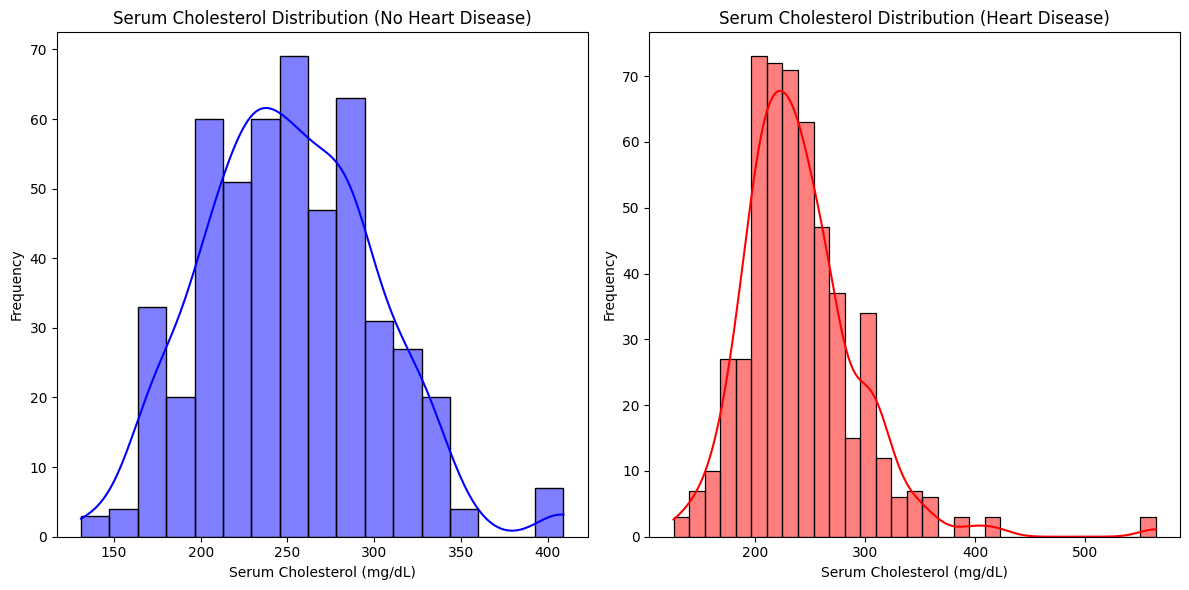

In [23]:
df_no_heart_disease = df[df['target'] == 0]
df_heart_disease = df[df['target'] == 1]

# Plot histogram for serum cholesterol for patients without heart disease
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_no_heart_disease['chol'], kde=True, color='blue')
plt.title('Serum Cholesterol Distribution (No Heart Disease)')
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Frequency')

# Plot histogram for serum cholesterol for patients with heart disease
plt.subplot(1, 2, 2)
sns.histplot(df_heart_disease['chol'], kde=True, color='red')
plt.title('Serum Cholesterol Distribution (Heart Disease)')
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

### Relationship of resting blood sugar and heart disease

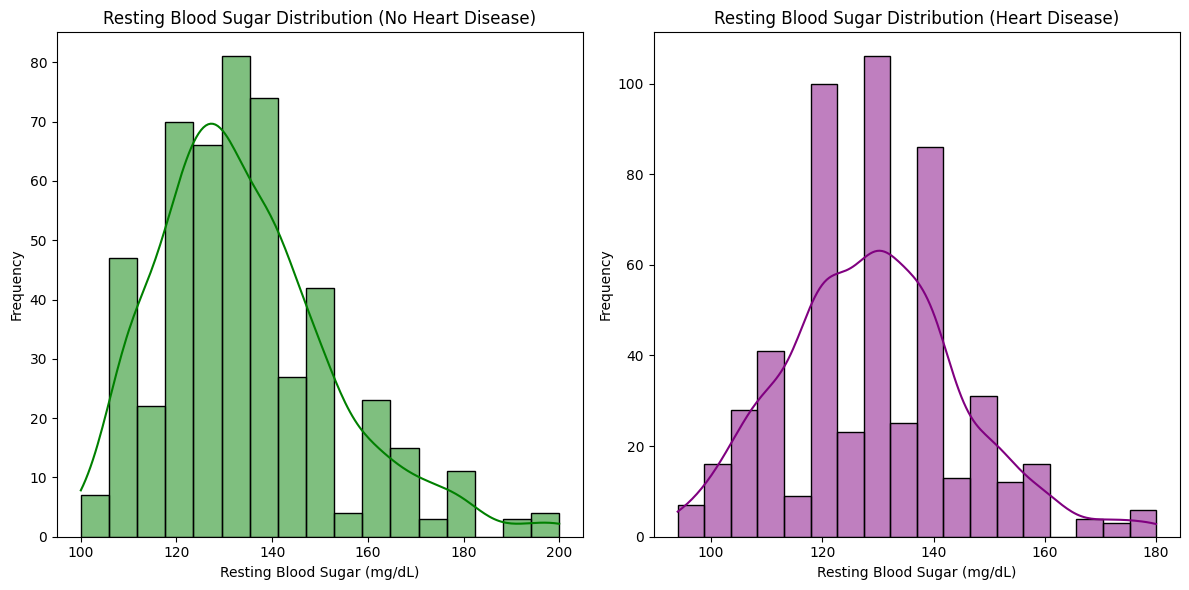

In [25]:
df_no_heart_disease = df[df['target'] == 0]
df_heart_disease = df[df['target'] == 1]

# Plot histogram for resting blood sugar for patients without heart disease
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_no_heart_disease['trestbps'], kde=True, color='green')
plt.title('Resting Blood Sugar Distribution (No Heart Disease)')
plt.xlabel('Resting Blood Sugar (mg/dL)')
plt.ylabel('Frequency')

# Plot histogram for resting blood sugar for patients with heart disease
plt.subplot(1, 2, 2)
sns.histplot(df_heart_disease['trestbps'], kde=True, color='purple')
plt.title('Resting Blood Sugar Distribution (Heart Disease)')
plt.xlabel('Resting Blood Sugar (mg/dL)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

### Relationship between maximum heart rate and heart disease

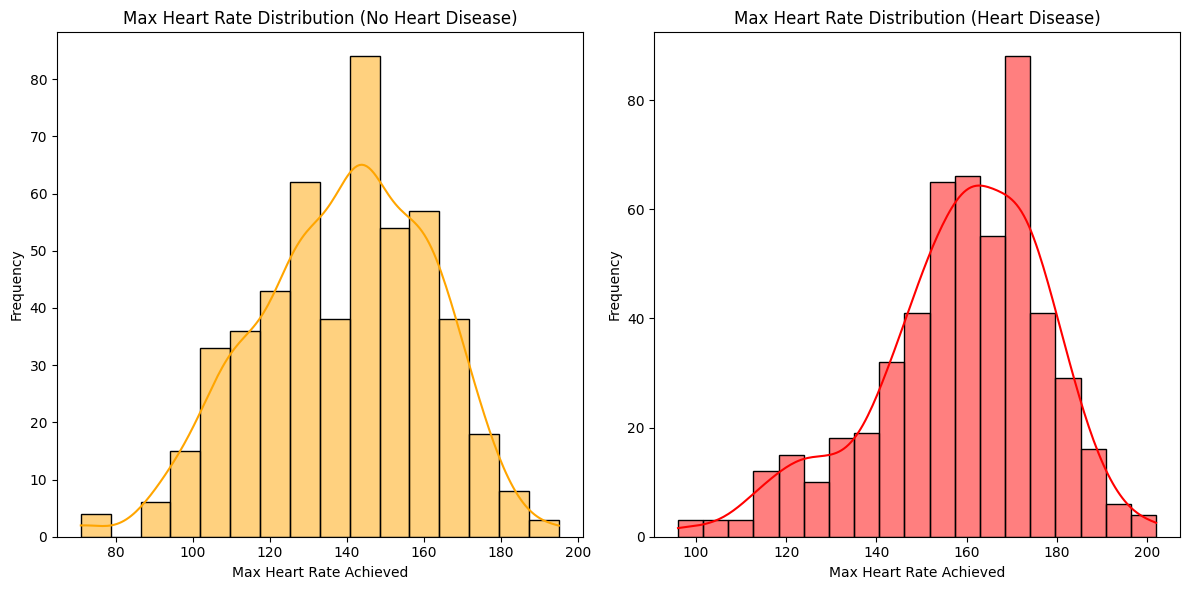

In [30]:
df_no_heart_disease = df[df['target'] == 0]
df_heart_disease = df[df['target'] == 1]

# Plot histogram for maximum heart rate achieved for patients without heart disease
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_no_heart_disease['thalach'], kde=True, color='orange')
plt.title('Max Heart Rate Distribution (No Heart Disease)')
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Frequency')

# Plot histogram for maximum heart rate achieved for patients with heart disease
plt.subplot(1, 2, 2)
sns.histplot(df_heart_disease['thalach'], kde=True, color='red')
plt.title('Max Heart Rate Distribution (Heart Disease)')
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()